In [1]:
using constants
using types
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")
Eoff=2.0
Tdata=[27.0,125.0,250.0,300.0,350.0,400.0
    ,450.0,500.0,550.0]
Ts=collect(290.0:10.0:900.0)#Tdata+273.0#
numofn=[-3.0e19]#,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
xs=[0.6]#collect(0.0:0.01:1.0)
Es=collect(0.0:0.1:3.0)
x=0.6
var0=[Ts[1],x]

EX3(var)=Eoff#+Egx3(var[1],var[2])
EX1(var)=Ec0(var[2])+EX3(var)
ELH(var)=Eoff-Egx3(var[1],var[2])
EHH(var)=Eoff-Egx3(var[1],var[2])

effMassX1(var)=X1effMass(var[1])*me
effMassX3(var)=0.38*me
effMassLH(var)=-1.0*me
effMassHH(var)=-1.5*me

bandX3=parBandTx(effMassX3(var0),0.0,EX3(var0),[EX3],[effMassX3],var0)
bandX1=parBandTx(effMassX1(var0),0.0,EX1(var0),[EX1],[effMassX1],var0)
bandHH=parBandTx(effMassHH(var0),0.0,EHH(var0),[EHH],[effMassHH],var0)
bandLH=parBandTx(effMassLH(var0),0.0,ELH(var0),[ELH],[effMassLH],var0)
bndstTx=BandStrucTx([bandLH,bandHH,bandX1,bandX1,bandX1,bandX3,bandX3,bandX3],var0)

NII=1e12*1e6
vartau0=[bandX3.effMass,Ts[1],1.0,x,1.5,bandX3,NII,bndstTx]
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst
tauAC(var)=tauAC_func(Cl(var[4]),acPhDa(var[4]),var[2],var[1],var[3],var[6])
tauPOP(var)=tauPOP_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1]
,var[3],tauPOPIIint(var[5],var[2],var[4],var[6]),var[7],opPhE(var[4]),var[8])
tauPOP2(var)=tauPOP2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauII2(var)=tauII2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[7],var[1],var[3],var[8])

tauTOTTx=tau_electron_B([tauAC,tauPOP2,tauII2],vartau0)#tauAC,tauII2,tauPOP2
tauACs=Array{Float64}(length(Es),length(Ts),length(numofn))
tauPOPs=Array{Float64}(length(Es),length(Ts),length(numofn))
tauIIs=Array{Float64}(length(Es),length(Ts),length(numofn))
tauTOTs=Array{Float64}(length(Es),length(Ts),length(numofn))

numofnsout=Array{Float64}(length(Ts),length(numofn))
numofnsoutn=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))
numofnsoutp=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))

xmax=3.0
sigmas=Array{Float64}(length(Ts),length(numofn))
seebecks=Array{Float64}(length(Ts),length(numofn))
Efs=Array{Float64}(length(Ts),length(numofn))

LoadError: LoadError: ArgumentError: Module Optim not found in current path.
Run `Pkg.add("Optim")` to install the Optim package.
while loading In[1], in expression starting on line 3

In [8]:
Pkg.add("Cubature")

INFO: Updating cache of Cubature...
INFO: Installing Cubature v1.2.0
INFO: Building Cubature
INFO: Installing Cubature 1.0.2 library...
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14.5M  100 14.5M    0     0   262k      0  0:00:56  0:00:56 --:--:--  281k


Compiling hcubature.c...
Compiling pcubature.c...
Linking libcubature...


INFO: Package database updated


In [9]:
using Cubature

INFO: Precompiling module Cubature.


In [6]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis,Efs)=electronicProps(bndstTx,xs,Ts,numofn,tauTOTTx,xmax)
l=0

LoadError: LoadError: BoundsError: attempt to access (
62x1x1 Array{Float64,3}:
[:, :, 1] =
 2.0219 
 2.02028
 2.01861
 2.01691
 2.01515
 2.01335
 2.01151
 2.00963
 2.0077 
 2.00574
 2.00373
 2.00169
 1.9996 
 ⋮      
 1.92531
 1.92506
 1.92494
 1.92492
 1.92501
 1.92519
 1.92547
 1.92583
 1.92627
 1.92679
 1.92737
 1.92802,

62x1x1 Array{Float64,3}:
[:, :, 1] =
 52561.4
 50526.3
 48855.3
 47272.3
 45985.8
 43981.3
 42773.7
 41635.6
 40551.2
 39611.3
 38518.2
 37495.5
 36522.6
     ⋮  
 23973.0
 24478.4
 25009.9
 25569.5
 26157.2
 26772.3
 27371.0
 28010.8
 28682.2
 29379.6
 30100.5
 30842.9,

62x1x1 Array{Float64,3}:
[:, :, 1] =
 -0.000207699
 -0.000213557
 -0.000218453
 -0.000223112
 -0.000226823
 -0.000232421
 -0.000236486
 -0.000240342
 -0.000244041
 -0.000247244
 -0.000251045
 -0.000254628
 -0.000258066
  ⋮          
 -0.000289982
 -0.00028692 
 -0.000283852
 -0.000280779
 -0.000277711
 -0.000274656
 -0.000271849
 -0.000268977
 -0.000266097
 -0.000263239
 -0.000260414
 -0.000257631,

62x1x1 Array{Float64,3}:
[:, :, 1] =
 0.330936
 0.326559
 0.324128
 0.321704
 0.321121
 0.314496
 0.31272 
 0.31106 
 0.309415
 0.308679
 0.30608 
 0.303754
 0.301537
 ⋮       
 0.791357
 0.837633
 0.88515 
 0.933875
 0.983746
 1.0347  
 1.0856  
 1.13785 
 1.19116 
 1.2454  
 1.30046 
 1.3563  ,

62x1x1 Array{Float64,3}:
[:, :, 1] =
 0.330936
 0.326558
 0.324127
 0.321702
 0.321118
 0.314491
 0.31271 
 0.311043
 0.309386
 0.308631
 0.306004
 0.303635
 0.301355
 ⋮       
 0.318712
 0.328187
 0.338111
 0.34853 
 0.359459
 0.370905
 0.381857
 0.393684
 0.406186
 0.419258
 0.432861
 0.446974,

62x1x1 Array{Float64,3}:
[:, :, 1] =
 -2.36117e-8
 -5.17416e-8
 -1.0869e-7 
 -2.18047e-7
 -4.22799e-7
 -7.69267e-7
 -1.37849e-6
 -2.39248e-6
 -4.03019e-6
 -6.62782e-6
 -1.05459e-5
 -1.64039e-5
 -2.49684e-5
  ⋮         
 -0.0373905 
 -0.0398285 
 -0.0422693 
 -0.0447092 
 -0.0471436 
 -0.0495677 
 -0.0519426 
 -0.0543127 
 -0.0566669 
 -0.0589981 
 -0.0613019 
 -0.0635749 ,

62x1x1 Array{Float64,3}:
[:, :, 1] =
 1.38814e-7 
 3.06355e-7 
 6.45659e-7 
 1.30031e-6 
 2.5232e-6  
 4.65775e-6 
 8.37742e-6 
 1.45995e-5 
 2.47096e-5 
 4.07812e-5 
 6.54016e-5 
 0.000102544
 0.000157401
 ⋮          
 0.435254   
 0.469617   
 0.50477    
 0.540636   
 0.577143   
 0.614224   
 0.651804   
 0.689849   
 0.728312   
 0.767143   
 0.806301   
 0.845748   )
  at index [8]
while loading In[6], in expression starting on line 155

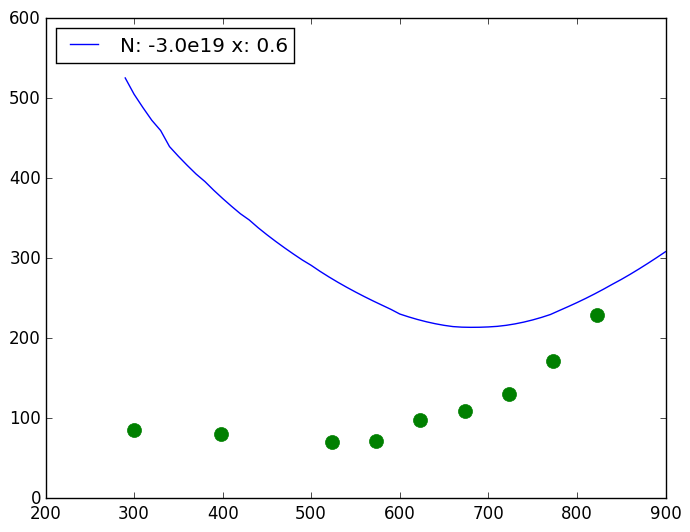

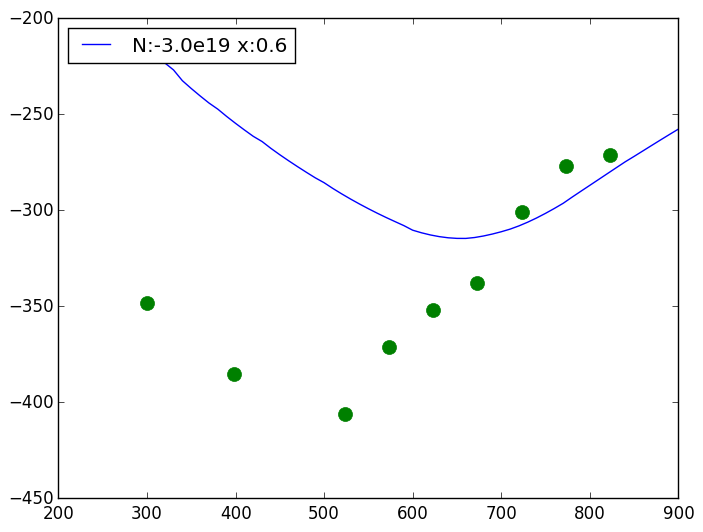

PyObject <matplotlib.legend.Legend object at 0x00000000241BA518>

In [7]:
colors=["b","g","r","c","m","y","k"]
PS_Sn06_0PAEC=[10.0,13.0,17.0,25.0
    ,30.0,46.0,88.0,108.0,232.0]
PS_Sn06_0PASC=[327.0,241.0,105.0,98.0,74.0,62.0
    ,42.0,35.0,15.0]
PS_Sn06_0PAEC_1=[85.0,80.0,70.0,72.0
    ,98.0,109.0,131.0,172.0,229.0]
PS_Sn06_0PASC_1=[348.0,385.0,406.0,371.0,352.0,338.0
    ,301.0,277.0,271.0]
plots=Array{Any}(length(numofn)*length(xs))
figure()
k=1
for p in 1:1:length(numofn)
    for q in 1:1:length(xs)                
        plot(Ts,sigmas[:,p,q]/100,linestyle="-",color=colors[mod(k,length(colors))]
        ,label=string("N: $(numofn[p]) x: $(xs[q])"))
        #push!(plots,p)
        k+=1
    end
end
#plot(Tdata.+273.15,PS_Sn06_0PAEC, linestyle="None",marker=".",markersize=20,color="r")
plot(Tdata.+273.15,PS_Sn06_0PAEC_1, linestyle="None",marker=".",markersize=20,color="g")
#ylim(0,3000)
legend(loc="upper left")
figure()
k=1
for p in 1:1:length(numofn)
    for q in 1:1:length(xs)
        plot(Ts,1e6*seebecks[:,p,q],color=colors[mod(k,length(colors))]
        ,label=string("N:$(numofn[p]) x:$(xs[q])")) 
        k+=1
    end
end
#plot(Tdata+273.15,-PS_Sn06_0PASC, linestyle="None",marker=".",markersize=20,color="r")
plot(Tdata+273.15,-PS_Sn06_0PASC_1, linestyle="None",marker=".",markersize=20,color="g")
#ylim(90,260)
legend(loc="upper left")

In [8]:
1e6seebecks

62x1x1 Array{Float64,3}:
[:, :, 1] =
 -207.699
 -213.557
 -218.453
 -223.112
 -226.823
 -232.421
 -236.486
 -240.342
 -244.041
 -247.244
 -251.045
 -254.628
 -258.066
    ⋮    
 -289.982
 -286.92 
 -283.852
 -280.779
 -277.711
 -274.656
 -271.849
 -268.977
 -266.097
 -263.239
 -260.414
 -257.631